In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


BASE_URL = "https://raw.githubusercontent.com/Marcusshi/BA820-A1-08/main/data/hollywood_age_gap/"

urls = {
    "age_gaps": BASE_URL + "age_gaps.csv",
}

age_gaps = pd.read_csv(urls["age_gaps"])

print("Data shape:", age_gaps.shape)
age_gaps.head()


Data shape: (1155, 13)


,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


**Part 1: Data Cleaning & Preparation**


**Motivation**

The raw data is compiled from multiple films and character records, with inconsistent naming conventions and implicit categories, making it unsuitable for direct structural comparison or rule-based analysis.

**Goal**

To transform age-gap relationships in films into structured variables that are comparable, groupable, and suitable for exploratory and association rule analysis.

**Key Transformations**

*   Standardize gender labels

*   Construct gender pairing categories (M–W, W–M, Same-sex)

*   Create decade-level time variables

*   Retain age difference as the primary outcome variable

In [30]:
df = age_gaps.copy()

df.info()

df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_name          1155 non-null   object
 1   release_year        1155 non-null   int64 
 2   director            1155 non-null   object
 3   age_difference      1155 non-null   int64 
 4   couple_number       1155 non-null   int64 
 5   actor_1_name        1155 non-null   object
 6   actor_2_name        1155 non-null   object
 7   character_1_gender  1155 non-null   object
 8   character_2_gender  1155 non-null   object
 9   actor_1_birthdate   1155 non-null   object
 10  actor_2_birthdate   1155 non-null   object
 11  actor_1_age         1155 non-null   int64 
 12  actor_2_age         1155 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 117.4+ KB


,0
movie_name,0
release_year,0
director,0
age_difference,0
couple_number,0
actor_1_name,0
actor_2_name,0
character_1_gender,0
character_2_gender,0
actor_1_birthdate,0


In [31]:
df["character_1_gender"] = df["character_1_gender"].str.lower().str.strip()
df["character_2_gender"] = df["character_2_gender"].str.lower().str.strip()

def pairing_type(row):
    g1, g2 = row["character_1_gender"], row["character_2_gender"]

    if g1 == "man" and g2 == "woman":
        return "M-W"
    elif g1 == "woman" and g2 == "man":
        return "W-M"
    elif g1 == "man" and g2 == "man":
        return "M-M"
    elif g1 == "woman" and g2 == "woman":
        return "W-W"
    else:
        return "Other"

df["pairing"] = df.apply(pairing_type, axis=1)
df

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,pairing
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,W-M
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,M-W
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,M-W
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,M-W
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,M-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,1,Liam Hemsworth,Jennifer Lawrence,man,woman,1990-01-13,1990-08-15,23,23,M-W
1151,The Lake House,2006,Alejandro Agresti,0,1,Sandra Bullock,Keanu Reeves,woman,man,1964-07-26,1964-09-02,42,42,W-M
1152,Tolkien,2019,Dome Karukoski,0,1,Lily Collins,Nicholas Hoult,woman,man,1989-03-18,1989-12-07,30,30,W-M
1153,Transformers,2007,Michael Bay,0,1,Megan Fox,Shia LaBeouf,woman,man,1986-05-16,1986-06-11,21,21,W-M


In [32]:
df["decade"] = (df["release_year"] // 10) * 10
df

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,pairing,decade
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,W-M,1970
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,M-W,2000
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,M-W,2000
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,M-W,1990
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,M-M,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,1,Liam Hemsworth,Jennifer Lawrence,man,woman,1990-01-13,1990-08-15,23,23,M-W,2010
1151,The Lake House,2006,Alejandro Agresti,0,1,Sandra Bullock,Keanu Reeves,woman,man,1964-07-26,1964-09-02,42,42,W-M,2000
1152,Tolkien,2019,Dome Karukoski,0,1,Lily Collins,Nicholas Hoult,woman,man,1989-03-18,1989-12-07,30,30,W-M,2010
1153,Transformers,2007,Michael Bay,0,1,Megan Fox,Shia LaBeouf,woman,man,1986-05-16,1986-06-11,21,21,W-M,2000


In [33]:
df["gap_bin"] = pd.cut(
    df["age_difference"],
    bins=[0, 5, 10, 15, 20, 100],
    labels=["0-4", "5-9", "10-14", "15-19", "20+"],
    right=False
)

df["gap_bin"].value_counts().sort_index()


,count
gap_bin,
0-4,343
5-9,303
10-14,200
15-19,136
20+,173


In [34]:
cols_to_drop = [
    "actor_1_name", "actor_2_name",
    "actor_1_birthdate", "actor_2_birthdate",
    "director"
]

df= df.drop(columns=cols_to_drop, errors="ignore").copy()

df

,movie_name,release_year,age_difference,couple_number,character_1_gender,character_2_gender,actor_1_age,actor_2_age,pairing,decade,gap_bin
0,Harold and Maude,1971,52,1,woman,man,75,23,W-M,1970,20+
1,Venus,2006,50,1,man,woman,74,24,M-W,2000,20+
2,The Quiet American,2002,49,1,man,woman,69,20,M-W,2000,20+
3,The Big Lebowski,1998,45,1,man,woman,68,23,M-W,1990,20+
4,Beginners,2010,43,1,man,man,81,38,M-M,2010,20+
...,...,...,...,...,...,...,...,...,...,...,...
1150,The Hunger Games: Catching Fire,2013,0,1,man,woman,23,23,M-W,2010,0-4
1151,The Lake House,2006,0,1,woman,man,42,42,W-M,2000,0-4
1152,Tolkien,2019,0,1,woman,man,30,30,W-M,2010,0-4
1153,Transformers,2007,0,1,woman,man,21,21,W-M,2000,0-4


**Part 2: Exploratory Data Analysis (EDA)**

**2.1 Age Difference Distribution**

**Motivation**

Before examining which conditions are associated with large age gaps, it is necessary to understand whether large age differences are common or represent rare extreme cases in the overall data.

**Objective**

To establish a global baseline for age differences, which serves as a reference for distinguishing between typical and unusually large age gaps in later analyses.

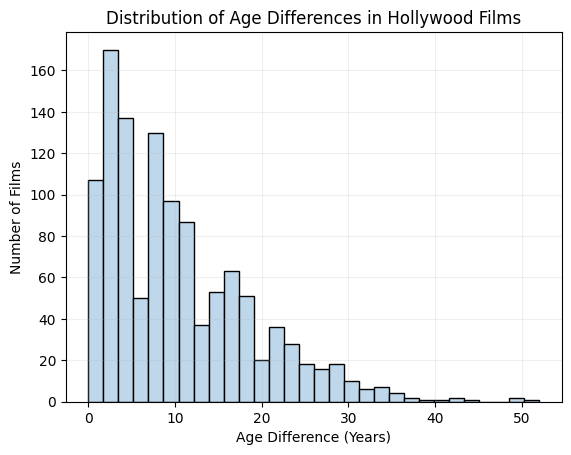

In [35]:
df["age_difference"].plot(
    kind="hist",
    bins=30,
    color="#BFD7EA",
    edgecolor="black"
)

plt.title("Distribution of Age Differences in Hollywood Films")
plt.xlabel("Age Difference (Years)")
plt.ylabel("Number of Films")
plt.grid(alpha=0.2)
plt.show()


**2.2 Age Difference by Gender Pairing**

**Motivation**

Given the presence of a clear age-gap structure in the overall distribution, a natural next question is whether this structure differs systematically across gender pairings.

**Objective**

To compare the distributions of age differences across M–W, W–M, and same-sex pairings.

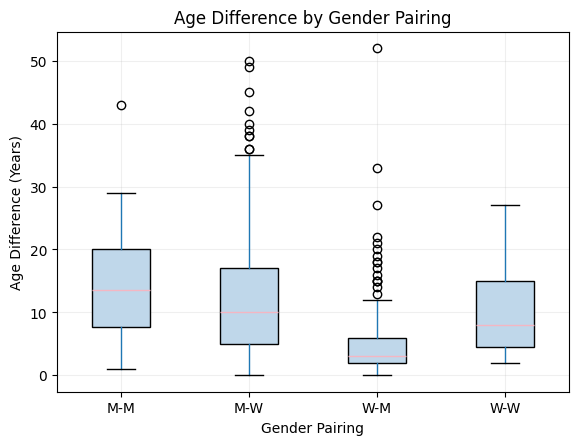

In [36]:
df.boxplot(
    column="age_difference",
    by="pairing",
    patch_artist=True,
    boxprops=dict(facecolor="#BFD7EA"),
    medianprops=dict(color="#F4B6C2")
)

plt.title("Age Difference by Gender Pairing")
plt.suptitle("")
plt.xlabel("Gender Pairing")
plt.ylabel("Age Difference (Years)")
plt.grid(alpha=0.2)
plt.show()


### **2.3 Decades Differences**

**Motivation**

The overall age-gap pattern may differ by gender pairing, especially by pairing direction.

**Objective**

Compare age_difference across M–W, W–M, M–M, and W–W.

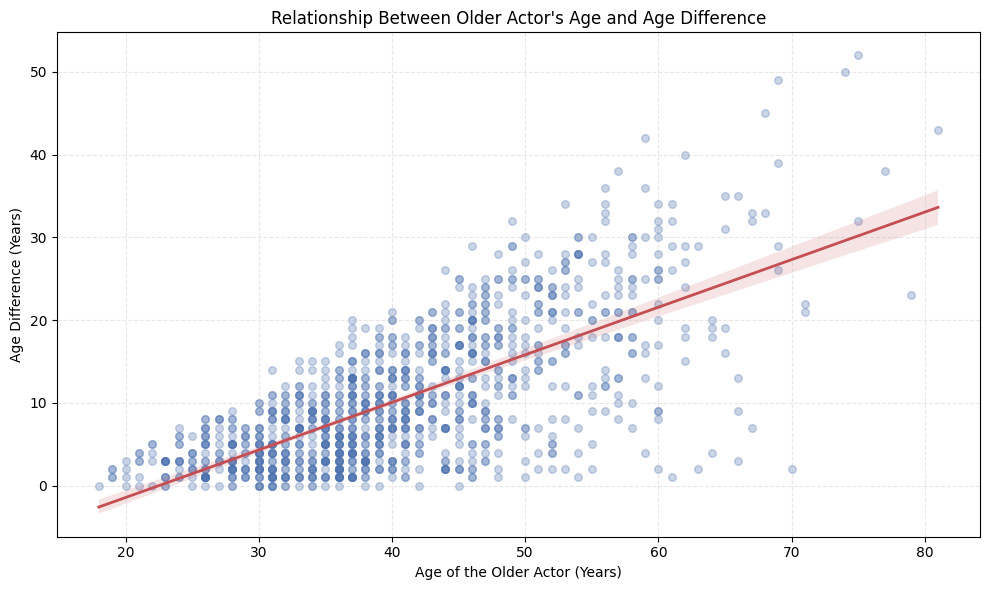

In [37]:
df["older_age"] = df[["actor_1_age", "actor_2_age"]].max(axis=1)

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x="older_age",
    y="age_difference",
    scatter_kws={
        "alpha": 0.3,
        "color": "#4C72B0",
        "s": 30
    },
    line_kws={
        "color": "#C44E52",
        "linewidth": 2
    }
)

plt.title("Relationship Between Older Actor's Age and Age Difference")
plt.xlabel("Age of the Older Actor (Years)")
plt.ylabel("Age Difference (Years)")
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


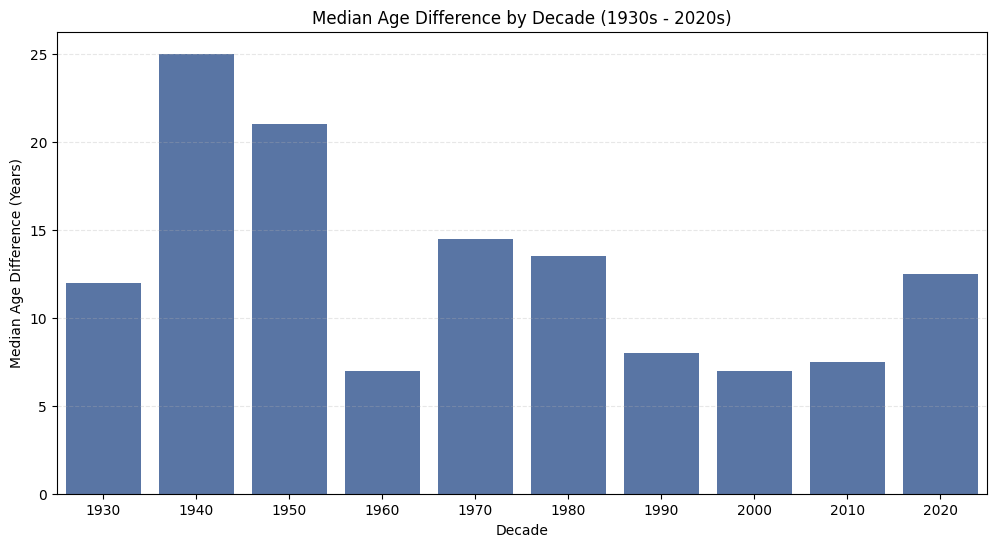

In [38]:
plt.figure(figsize=(12, 6))

decade_summary = (
    df.groupby("decade")["age_difference"]
      .median()
      .reset_index()
      .sort_values("decade")
)

sns.barplot(
    data=decade_summary,
    x="decade",
    y="age_difference",
    errorbar=None,
    color="#4C72B0"
)

plt.title("Median Age Difference by Decade (1930s - 2020s)")
plt.xlabel("Decade")
plt.ylabel("Median Age Difference (Years)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

**Finding：**

Over the past 90 years, the "typical age gap" (median) of Hollywood couples has not been a smooth straight line, but has fluctuated significantly between different eras. For instance, the median was significantly higher in some earlier periods (such as the Golden Age) than in modern times.

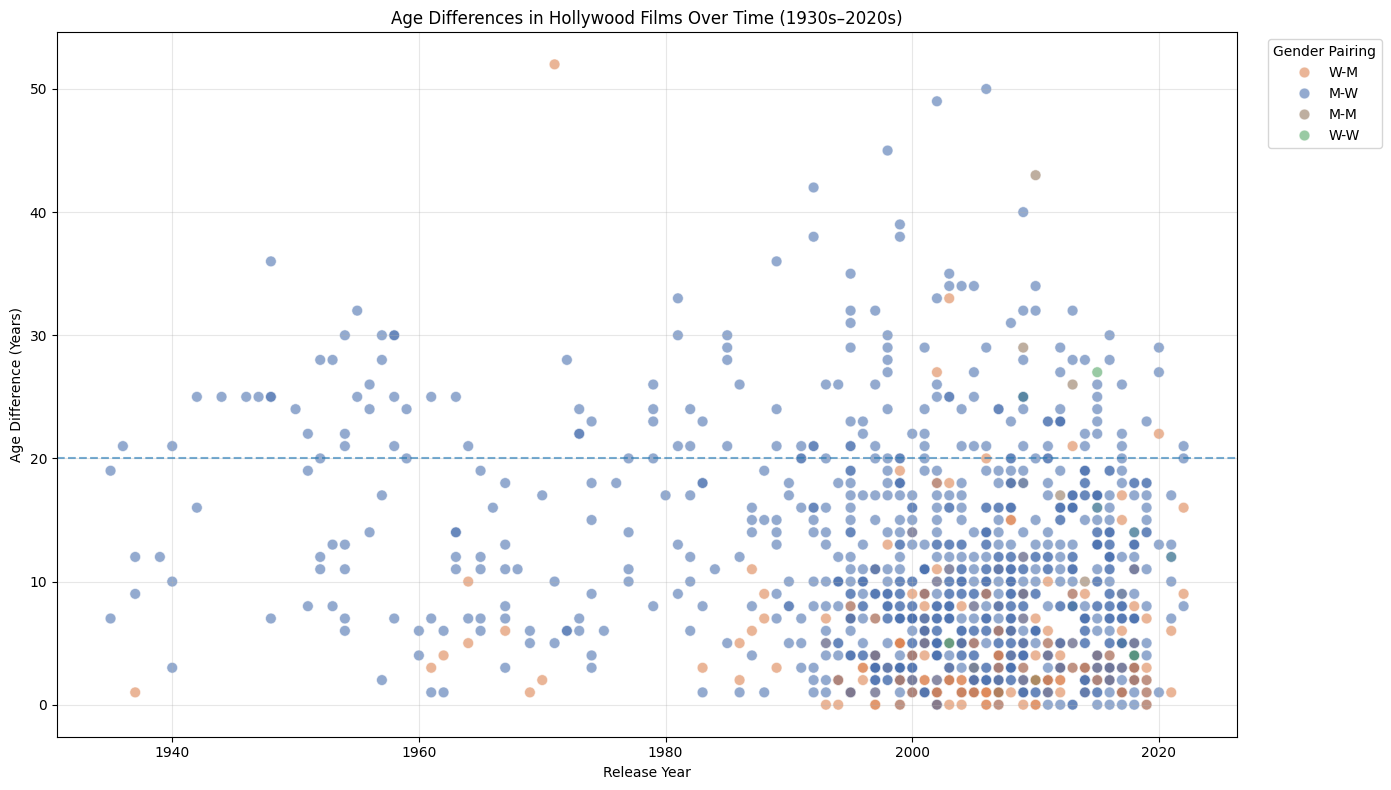

In [39]:
df["character_1_gender"] = df["character_1_gender"].astype(str).str.lower().str.strip()
df["character_2_gender"] = df["character_2_gender"].astype(str).str.lower().str.strip()

def pairing_type(row):
    g1, g2 = row["character_1_gender"], row["character_2_gender"]
    if g1 == "man" and g2 == "woman":
        return "M-W"
    if g1 == "woman" and g2 == "man":
        return "W-M"
    if g1 == "man" and g2 == "man":
        return "M-M"
    if g1 == "woman" and g2 == "woman":
        return "W-W"
    return "Other"

df["pairing"] = df.apply(pairing_type, axis=1)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df,
    x="release_year",
    y="age_difference",
    hue="pairing",
    palette={
        "M-W": "#4C72B0",
        "W-M": "#DD8452",
        "M-M": "#937860",
        "W-W": "#55A868",
        "Other": "gray"
    },
    alpha=0.6,
    s=60
)

plt.title("Age Differences in Hollywood Films Over Time (1930s–2020s)")
plt.xlabel("Release Year")
plt.ylabel("Age Difference (Years)")
plt.axhline(20, linestyle="--", alpha=0.6)
plt.legend(title="Gender Pairing", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Findings:**

The data shows a distinct hierarchical structure. The majority of movies are densely concentrated in the bottom (the age range of 0-15 years), forming a "normal cluster"; while above this normal cluster, there is always a sparse but persistent "high-age-difference movies" layer (20 years and above), and these peaks are almost exclusively composed of "older men and younger women" combinations.

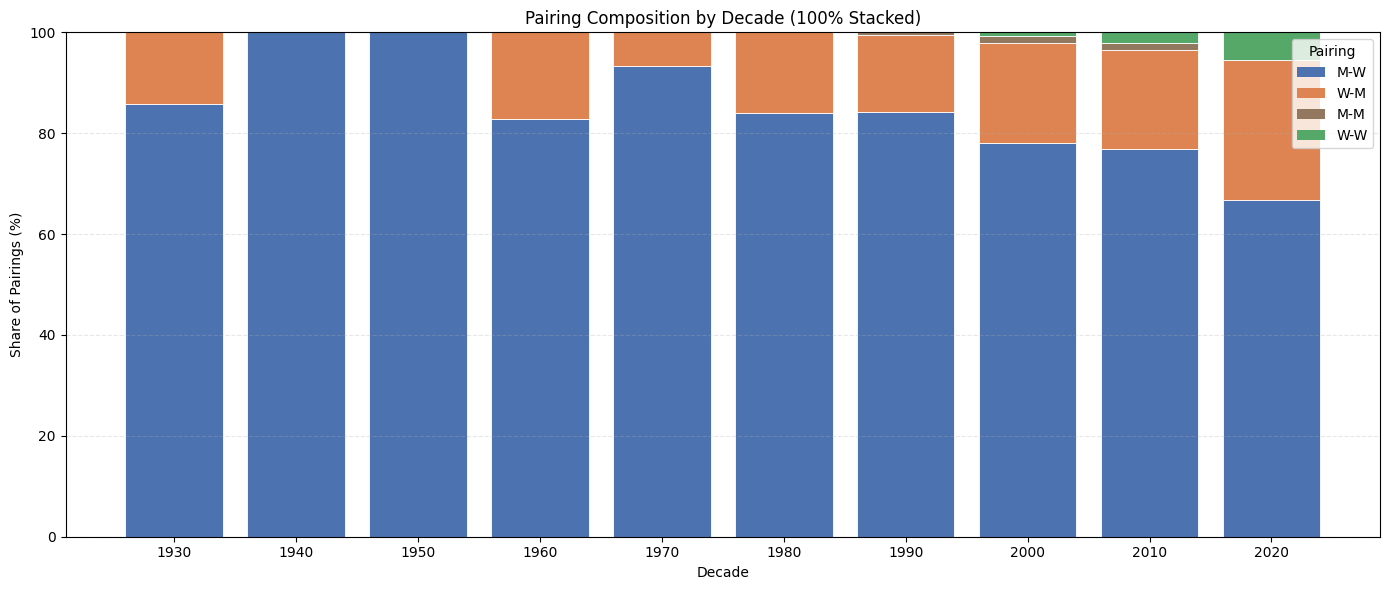

In [40]:
required_cols = ["release_year", "pairing"]
missing = [c for c in required_cols if c not in df.columns]
assert len(missing) == 0, f"Missing columns: {missing}"

if "decade" not in df.columns:
    df["decade"] = (df["release_year"] // 10) * 10

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

pairing_order = ["M-W", "W-M", "M-M", "W-W"]
df_plot = df[df["pairing"].isin(pairing_order)].copy()

counts = (
    df_plot.groupby(["decade", "pairing"])
           .size()
           .unstack(fill_value=0)
           .reindex(columns=pairing_order)
           .sort_index()
)

props = counts.div(counts.sum(axis=1), axis=0) * 100

decades = props.index.tolist()
x = np.arange(len(decades))

fig, ax = plt.subplots(figsize=(14, 6))

colors = {
    "M-W": "#4C72B0",
    "W-M": "#DD8452",
    "M-M": "#937860",
    "W-W": "#55A868",
}

bottom = np.zeros(len(decades))
bar_width = 0.8

for p in pairing_order:
    ax.bar(
        x,
        props[p].values,
        bottom=bottom,
        width=bar_width,
        color=colors[p],
        edgecolor="white",
        linewidth=0.6,
        label=p
    )
    bottom += props[p].values

ax.set_xticks(x)
ax.set_xticklabels(decades)
ax.set_ylim(0, 100)
ax.set_title("Pairing Composition by Decade (100% Stacked)")
ax.set_xlabel("Decade")
ax.set_ylabel("Share of Pairings (%)")
ax.grid(axis="y", linestyle="--", alpha=0.3)

handles = [Patch(facecolor=colors[p], label=p) for p in pairing_order]
ax.legend(handles=handles, title="Pairing", loc="upper right")

plt.tight_layout()
plt.show()


**Findings:**

In any given era, the "male older, female younger (M-W)" combination has always accounted for an overwhelming majority (typically over 80%). Although the proportion of "female older, male younger (W-M)" has slightly increased in recent decades, it still remains in a marginal position in the overall picture.